# Regressão 01 - tarefa 03 - transformações em X e Y 
# Regression 01 - task 03 - transformations in X and Y <br>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import load_dataset


import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

<br>**Carregando e definindo dados:**
<br>**Loading and defining data:**

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


<br><br>
### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, time e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

### I. Model tip amount

1. Create the design matrix (and y matrix) using Patsy, for a model in ```tip```, explained by ```sex, smoker, time and net_bill```.
2. Remove non-significant variables.
3. observe the residual graph as a function of ```net_bill```
4. test transforming ```net_bill``` into the log and a polynomial. Choose the best model.

**Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em "tip", explicada por "sex", "smoker", "time" e "net_bill":**<br>
**Create the design matrix (and y matrix) using Patsy, for a model in "tip", explained by "sex", "smoker", "time" and "net_bill":**

In [3]:
y,X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
modelo = sm.OLS(y,X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           2.64e-20
Time:                        12:05:58   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.

<br><br>**Remova as variáveis não significantes e observe o gráfico de resíduos em função de "net_bill":**
<br>**Remove non-significant variables and observe the residual graph as a function of "net_bill":**

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           5.02e-23
Time:                        12:05:58   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

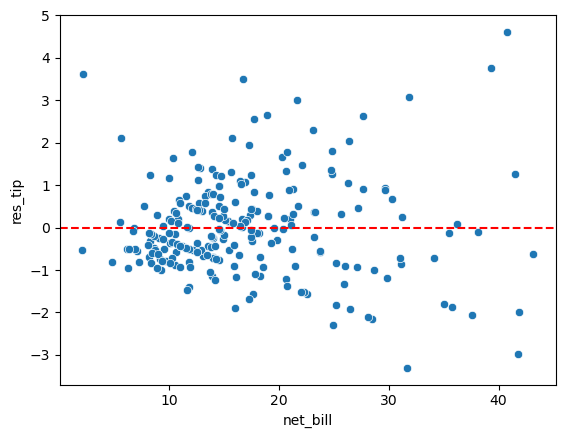

In [4]:
y,X = patsy.dmatrices('tip ~ net_bill', tips)
modelo = sm.OLS(y,X).fit()

tips['res_tip'] = modelo.resid

print(modelo.summary())

sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

<br>**Teste transformar "net_bill" no log:**
<br>**Test transform "net_bill" in the log:**

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           4.40e-20
Time:                        12:05:58   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

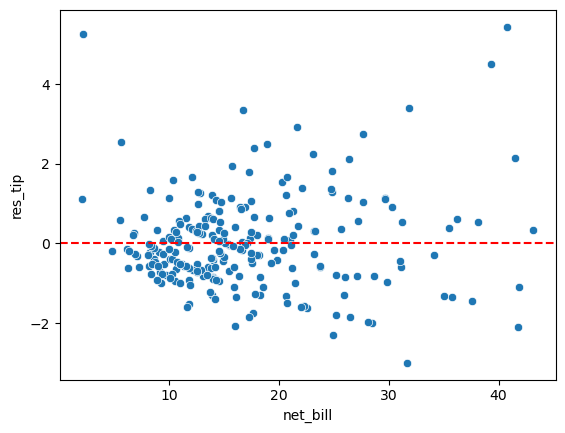

In [5]:
y,X = patsy.dmatrices('tip ~ np.log(net_bill)', tips)
modelo = sm.OLS(y,X).fit()

tips['res_tip'] = modelo.resid

print(modelo.summary())

sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

<br>**Teste transformar "net_bill" em polinômio:**
<br>**Test transform "net_bill" into polynomial:**

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     104.1
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.47e-20
Time:                        12:05:59   Log-Likelihood:                -381.31
No. Observations:                 244   AIC:                             766.6
Df Residuals:                     242   BIC:                             773.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.25

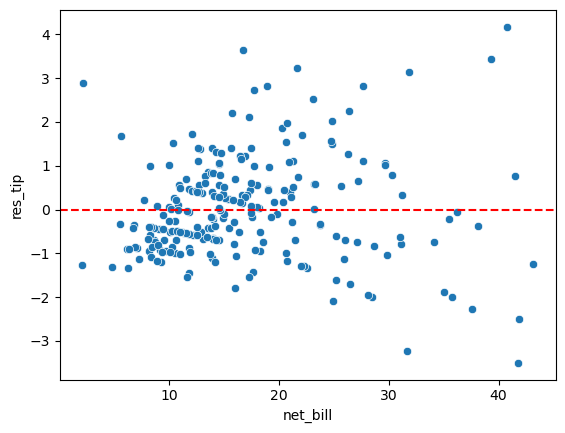

In [6]:
y,X = patsy.dmatrices('tip ~ np.power(net_bill,2)', tips)
modelo = sm.OLS(y,X).fit()

tips['res_tip'] = modelo.resid

print(modelo.summary())

sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**Escolha o melhor modelo entre as correção feitas:**<br>
**Choose the best model from the corrections made:**<br><br>
O "net_bill" utilizado com o Polinômio se comportou melhor, com o valor de R² = 30.1%<br>
The "net_bill" used with the Polynomial behaved better, with the value of R² = 30.1%<br>


<br><br>
### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, time e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

### II. Model on tip percentage value

1. Create the design matrix (and y matrix) using Patsy, for a model in the ```tip``` log, explained by ```sex, smoker, time and net_bill```.
2. Remove non-significant variables.
3. Observe the residual graph as a function of ```net_bill```
4. Test transforming ```net_bill``` into the log and a polynomial. Choose the best model.
5. From the final model of this item, calculate the $R^2$ on the ```tip``` scale (without the log). Compare with the model in item 1. Which has the better coefficient of determination?

**Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de "tip", explicado por: "sex", "smoker", "time" and "net_bill":**<br>
**Create the design matrix (and y matrix) using Patsy, for a model in the "tip" log, explained by: "sex", "smoker", "time" and "net_bill":**

In [7]:
reg = smf.ols('np.log(tip) ~ sex + smoker + time + net_bill', tips).fit()
print(reg.summary())


                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           1.21e-18
Time:                        12:05:59   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.

**R² da regressão:**<br>
**R² of regression:**

In [8]:
tips['pred_y'] = np.exp(reg.fittedvalues)
tips[['pred_y', 'tip']].corr().iloc[0,1]**2

0.3244510107999182

<br><br>**Remova as variáveis não significantes e observe o gráfico de resíduos em função de "net_bill":**
<br>**Remove non-significant variables and observe the residual graph as a function of "net_bill":**

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           2.60e-21
Time:                        12:05:59   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.0

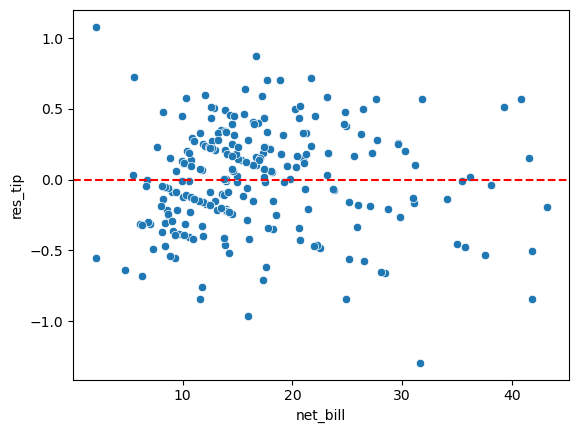

In [9]:
reg = smf.ols('np.log(tip) ~ net_bill', tips).fit()
print(reg.summary())

tips['res_tip'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**R² da regressão:**<br>
**R² of regression:**

In [10]:
tips['pred_y'] = np.exp(reg.fittedvalues)
tips[['pred_y', 'tip']].corr().iloc[0,1]**2

0.3156447351194493

<br><br><br>**Teste transformar "net_bill" com Log:**
<br>**Test transform "net_bill" with Log:**


                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.316
Method:                 Least Squares   F-statistic:                     113.5
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           5.62e-22
Time:                        12:05:59   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

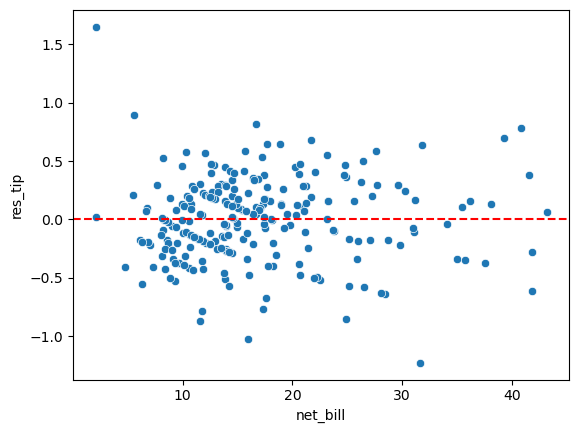

In [11]:
reg = smf.ols('np.log(tip) ~ np.log(net_bill)', tips).fit()
print(reg.summary())

tips['res_tip'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**R² da regressão com log:**<br>
**R² of regression with log:**

In [12]:
tips['pred_y'] = np.exp(reg.fittedvalues)
tips[['pred_y', 'tip']].corr().iloc[0,1]**2

0.32837743855275575

<br><br><br>**Teste transformar "net_bill" com polinômio. Escolha o melhor modelo:**
<br>**Test transform "net_bill" with polynomial. Choose the best model:**

                            OLS Regression Results                            
Dep. Variable:            np.log(tip)   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     80.67
Date:                Mon, 06 Nov 2023   Prob (F-statistic):           7.70e-17
Time:                        12:06:00   Log-Likelihood:                -108.16
No. Observations:                 244   AIC:                             220.3
Df Residuals:                     242   BIC:                             227.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.78

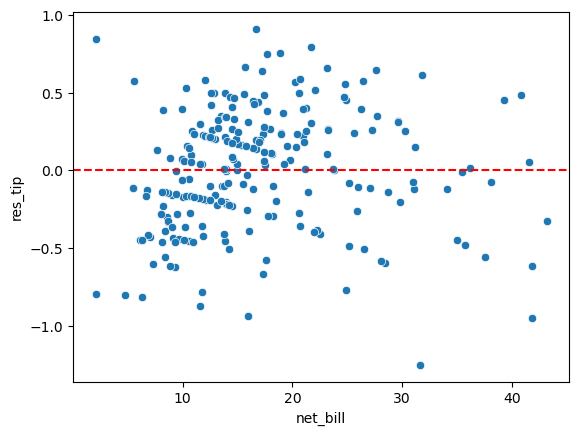

In [13]:
reg = smf.ols('np.log(tip) ~ np.power(net_bill,2)', tips).fit()
print(reg.summary())

tips['res_tip'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res_tip', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

**R² da regressão com polinômio:**<br>
**R² of regression with polynomial:**

In [14]:
tips['pred_y'] = np.exp(reg.fittedvalues)
tips[['pred_y', 'tip']].corr().iloc[0,1]**2

0.26748820870232776

**Escolha o melhor modelo entre as correção feitas:**<br>
**Choose the best model from the corrections made:**<br><br>
O net_bill utilizado com o Logaritimo se comportou melhor, com o valor de R² = 32.8%<br>
The net_bill used with Logaritimo behaved better, with the value of R² = 32.8%<br><br><br>

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

### III. Income Forecast
Let's work on the basis that you will use in the project at the end of this cycle.

Load the database ```previsao_de_renda.csv```.

|variable|description|
|-|-|
|data_ref | Variable collection reference date |
|index | Customer identification code |
|sexo | Customer gender|
|posse_de_veiculo | Indicates whether the customer has a vehicle |
|posse_de_imovel | Indicates whether the client owns property |
|qtd_filhos | Number of customer's children|
|tipo_renda | Type of customer income |
|educacao | Customer's education level |
|estado_civil | Client's marital status |
|tipo_residencia | Type of customer residence (owned, rented, etc.)|
|idade | Customer age|
|tempo_emprego | Time in current job |
|qt_pessoas_residencia | Number of people living in the residence |
|renda | Income in reais |

1. Fit a simple linear regression model to explain ```renda``` as the response variable, with ```tempo_emprego``` as the explanatory variable. Note that there are many observations in this table. Use the resources you deem necessary.
2. Carry out a waste analysis. With the features seen in this module, how would you improve this regression?
3. Fit a multiple linear regression model to explain ```renda``` (or a transformation of ```renda```) according to the other variables.
4. Remove non-significant variables and adjust the model again. Interpret the parameters
5. Carry out a waste analysis. Evaluate the quality of the fit.

<br><br><br>
**Carregando dados:**<br>
**Loading data:**<br><br>
- Realizando correções em dados faltantes, duplicados e colunas que não serão úteis.<br>
- Making corrections to missing data, duplicates and columns that will not be useful.

In [15]:
df = pd.read_csv('previsao_de_renda.csv')
drop = df[['Unnamed: 0','id_cliente']]
df = df.drop(drop, axis = 1)
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,F,False,True,0,Empresário,Secundário,Solteiro,Casa,48,13.887671,1.0,7990.58
14996,2016-03-01,F,False,True,0,Pensionista,Superior completo,Solteiro,Casa,57,NaN,1.0,10093.45
14997,2016-03-01,F,True,True,0,Assalariado,Superior completo,Casado,Casa,45,7.832877,2.0,604.82
14998,2016-03-01,M,True,False,0,Empresário,Superior completo,Casado,Casa,36,4.298630,2.0,3352.27


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   sexo                   15000 non-null  object 
 2   posse_de_veiculo       15000 non-null  bool   
 3   posse_de_imovel        15000 non-null  bool   
 4   qtd_filhos             15000 non-null  int64  
 5   tipo_renda             15000 non-null  object 
 6   educacao               15000 non-null  object 
 7   estado_civil           15000 non-null  object 
 8   tipo_residencia        15000 non-null  object 
 9   idade                  15000 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  15000 non-null  float64
 12  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.3+ MB


In [17]:
df.isnull().sum()

data_ref                    0
sexo                        0
posse_de_veiculo            0
posse_de_imovel             0
qtd_filhos                  0
tipo_renda                  0
educacao                    0
estado_civil                0
tipo_residencia             0
idade                       0
tempo_emprego            2573
qt_pessoas_residencia       0
renda                       0
dtype: int64

In [18]:
df = df.dropna()

In [19]:
df = df.drop_duplicates()

In [20]:
df = df.reset_index(drop=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12090 entries, 0 to 12089
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12090 non-null  object 
 1   sexo                   12090 non-null  object 
 2   posse_de_veiculo       12090 non-null  bool   
 3   posse_de_imovel        12090 non-null  bool   
 4   qtd_filhos             12090 non-null  int64  
 5   tipo_renda             12090 non-null  object 
 6   educacao               12090 non-null  object 
 7   estado_civil           12090 non-null  object 
 8   tipo_residencia        12090 non-null  object 
 9   idade                  12090 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  12090 non-null  float64
 12  renda                  12090 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.0+ MB


<br><br>**Ajuste um modelo de regressão linear simples para explicar "renda" como variável resposta, por "tempo_emprego" como variável explicativa:**
<br>**Adjust a simple linear regression model to explain "renda" as a response variable, with "tempo_emprego" as an explanatory variable:**

In [22]:
y,X = patsy.dmatrices('renda ~ tempo_emprego', df)
results = sm.OLS(y,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2104.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:06:01   Log-Likelihood:            -1.2618e+05
No. Observations:               12090   AIC:                         2.524e+05
Df Residuals:                   12088   BIC:                         2.524e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2157.2427    114.371     18.862

<br>**Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?**<br>
**Carry out a residue analysis. With the resources seen in this module, how would you improve this regression?**

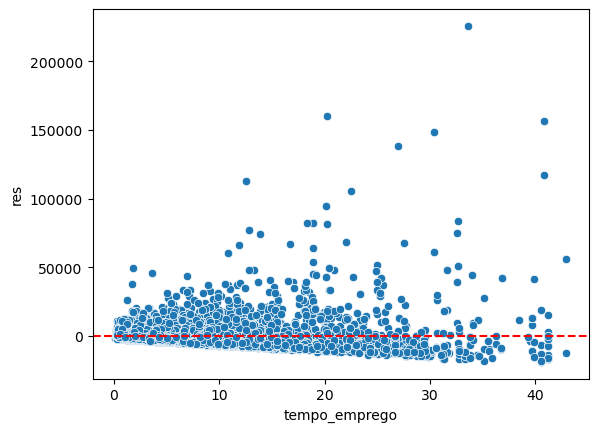

In [23]:
df['res'] = results.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

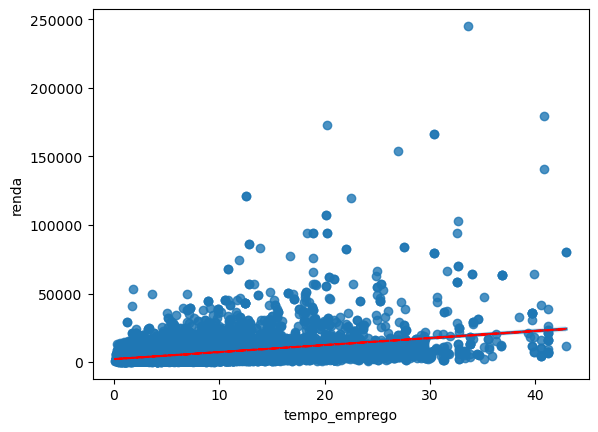

In [24]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df)
plt.plot(df['tempo_emprego'], results.fittedvalues, 'r,--')

**Com os recursos vistos neste módulo, como você melhoraria esta regressão?**<br>
**With the resources seen in this module, how would you improve this regression?**

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2495.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:06:03   Log-Likelihood:                -14753.
No. Observations:               12090   AIC:                         2.951e+04
Df Residuals:                   12088   BIC:                         2.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8362      0.011    689.619

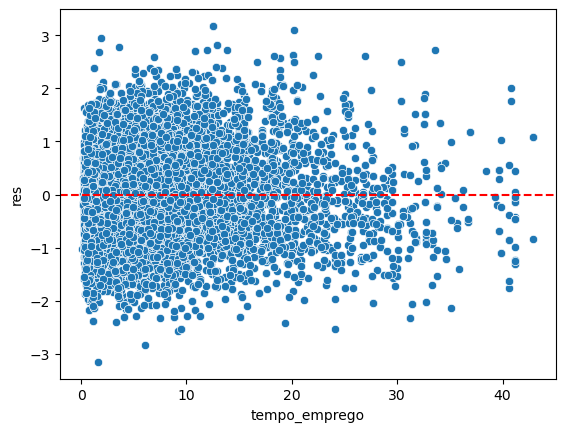

In [25]:
y,X = patsy.dmatrices('np.log(renda) ~ tempo_emprego', df)
reg = sm.OLS(y,X).fit()
print(reg.summary())


df['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = df)
plt.axhline(y=0, color='r', linestyle='--')

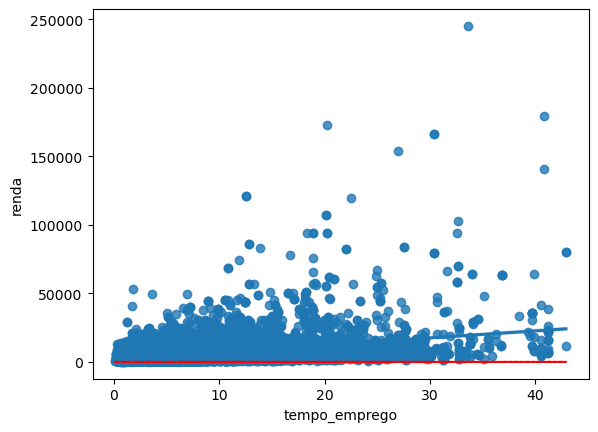

In [26]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df)
plt.plot(df['tempo_emprego'], reg.fittedvalues, 'r,--')

- Valor de **R²** e o gráfico do ajuste para o modelo:<br>
- Value of **R²** and the adjustment graph for the model:

In [27]:
df['y_chap'] = np.exp(reg.fittedvalues)
df[['y_chap', 'renda']].corr().iloc[0,1]**2

0.14833335554894533

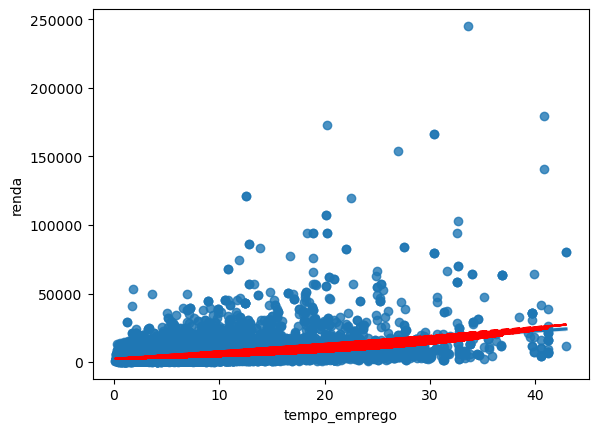

In [28]:
sns.regplot(x = 'tempo_emprego', y = 'renda', data = df)
plt.plot(df['tempo_emprego'], df['y_chap'], 'r,--')

<br><br><br>**Ajuste um modelo de regressão linear múltipla para explicar renda (ou uma transformação de renda) de acordo com as demais variáveis:**<br>
**Fit a multiple linear regression model to explain "renda" (or an "renda" transformation) according to the other variables:**

In [29]:
# Data adjustments:
dados = df.drop(['res', 'y_chap'], axis = 1).copy()
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12090 entries, 0 to 12089
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               12090 non-null  object 
 1   sexo                   12090 non-null  object 
 2   posse_de_veiculo       12090 non-null  bool   
 3   posse_de_imovel        12090 non-null  bool   
 4   qtd_filhos             12090 non-null  int64  
 5   tipo_renda             12090 non-null  object 
 6   educacao               12090 non-null  object 
 7   estado_civil           12090 non-null  object 
 8   tipo_residencia        12090 non-null  object 
 9   idade                  12090 non-null  int64  
 10  tempo_emprego          12090 non-null  float64
 11  qt_pessoas_residencia  12090 non-null  float64
 12  renda                  12090 non-null  float64
dtypes: bool(2), float64(3), int64(2), object(6)
memory usage: 1.0+ MB


In [30]:
reg = smf.ols('''np.log(renda) ~ tempo_emprego + idade + posse_de_imovel + sexo 
              + qtd_filhos + posse_de_veiculo + qt_pessoas_residencia 
              + tipo_residencia + educacao''', dados).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     408.0
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:06:07   Log-Likelihood:                -13274.
No. Observations:               12090   AIC:                         2.658e+04
Df Residuals:                   12073   BIC:                         2.671e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

**Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros:**<br>
**Remove non-significant variables and adjust the model again. Interpret the parameters:**

In [31]:
reg = smf.ols('np.log(renda) ~ tempo_emprego + idade + posse_de_imovel + sexo + qtd_filhos + posse_de_veiculo', dados).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1068.
Date:                Mon, 06 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:06:07   Log-Likelihood:                -13316.
No. Observations:               12090   AIC:                         2.665e+04
Df Residuals:                   12083   BIC:                         2.670e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

**Faça uma análise de resíduos. Avalie a qualidade do ajuste:**<br>
**Carry out a residue analysis. Rate fit quality:**

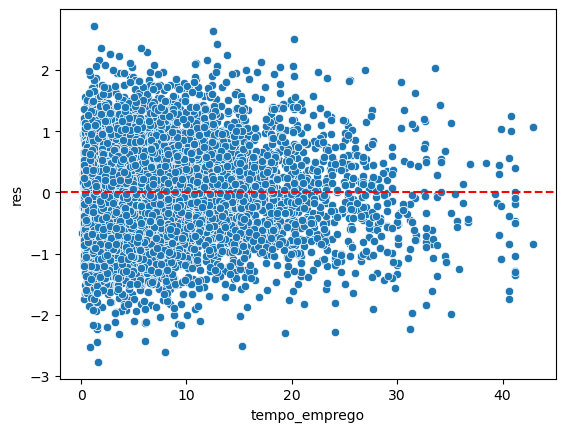

In [32]:
dados['res'] = reg.resid

sns.scatterplot(x = 'tempo_emprego', y = 'res', data = dados)
plt.axhline(y=0, color='r', linestyle='--')

In [33]:
# R² value:
dados['y_chap'] = np.exp(reg.fittedvalues)
dados[['y_chap', 'renda']].corr().iloc[0,1]**2

0.3618490540370284

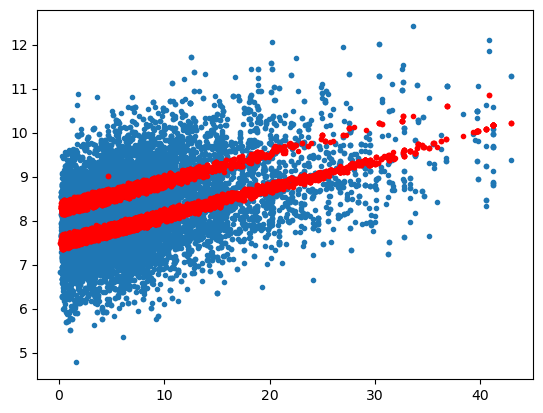

In [34]:
# fit graph for the model:
dados['renda_log']= np.log(dados['renda'])
dados['pred_log'] = reg.fittedvalues

plt.plot(dados['tempo_emprego'], dados['renda_log'], '.')
plt.plot(dados['tempo_emprego'], dados['pred_log'], 'r.')

- Estamos explicado 36.2% da variabilidade total dos dados com o R², o que é um bom índice comparado com os resultados anteriores feitos. O gráfico de resíduos demonstra um bom equilíbrio dos dados, assim como a ultima plotagem da predição dos dados em vermelho.<br><br>
- We explained 36.2% of the total data variability with R², which is a good index compared to previous results. The residual plot demonstrates a good balance of the data, as does the last plot of the data prediction in red.